<a href="https://colab.research.google.com/github/alexandragrecu/Bark-and-Purr/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from time import time
#register_motplotlib_converters()

In [ ]:
annual_temperatures = pd.read_csv('annual_temperatures.csv', skiprows=1)
monthly_temperatures = pd.read_csv('monthly_temperatures.csv', skiprows=2)

In [ ]:
annual_temperatures.head()

,Unnamed: 0,Romania,Alba,Arad,Arges,Bacau,Bihor,Bistrita-nasaud,Botosani,Braila,...,Salaj,Satu Mare,Sibiu,Suceava,Teleorman,Timis,Tulcea,Vaslui,Vilcea,Vrancea
0,1901,8.85,7.05,9.62,8.34,8.07,8.94,6.37,9.46,11.16,...,8.28,9.06,7.54,6.13,11.37,10.39,11.19,9.69,7.90,8.56
1,1902,7.99,6.26,8.99,7.47,6.99,8.11,5.44,8.24,10.18,...,7.37,8.12,6.69,5.02,10.56,9.96,10.07,8.54,7.19,7.49
2,1903,9.25,7.51,10.15,8.74,8.33,9.37,6.76,9.76,11.45,...,8.73,9.49,7.95,6.42,11.79,11.04,11.31,9.96,8.39,8.79
3,1904,8.65,6.99,9.84,8.10,7.58,8.95,6.19,8.85,10.70,...,8.18,8.94,7.37,5.65,11.17,10.85,10.42,9.10,7.85,8.09
4,1905,8.84,7.07,9.71,8.34,7.92,8.93,6.35,9.29,11.07,...,8.28,9.04,7.56,5.99,11.40,10.61,11.01,9.52,7.99,8.40


In [ ]:
# rename first column
annual_temperatures.rename(columns={'Unnamed: 0': 'Date', 'Romania': 'Temperature'}, inplace=True)

In [ ]:
# test to see if the renaming had effect
assert annual_temperatures.columns[0] == 'Date'
assert annual_temperatures.columns[1] == 'Temperature'

In [ ]:
# subset the dataset
annual_temperatures = annual_temperatures[['Date', 'Temperature']]

In [ ]:
annual_temperatures.head()

,Date,Temperature
0,1901,8.85
1,1902,7.99
2,1903,9.25
3,1904,8.65
4,1905,8.84


In [ ]:
# check if there are any missing values
annual_temperatures.isna().sum()

Date           0
Temperature    0
dtype: int64

In [ ]:
# set date as index
annual_temperatures.set_index('Date', inplace=True)

In [ ]:
#convert the index to a datetime object
annual_temperatures.index = pd.to_datetime(annual_temperatures.index, format="%Y")

In [ ]:
# infer the frequency of the data
annual_temperatures = annual_temperatures.asfreq(pd.infer_freq(annual_temperatures.index))

In [ ]:
annual_temperatures.head()

,Temperature
Date,
1901-01-01,8.85
1902-01-01,7.99
1903-01-01,9.25
1904-01-01,8.65
1905-01-01,8.84


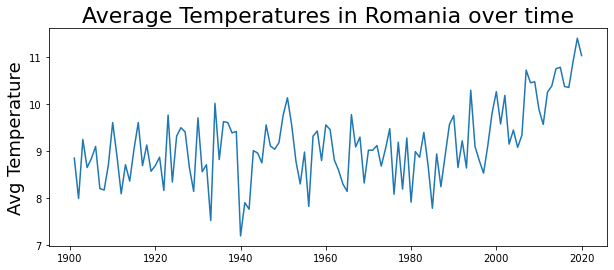

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(annual_temperatures['Temperature'])
plt.title('Average Temperatures in Romania over time', fontsize=22)
plt.ylabel('Avg Temperature', fontsize=18)
plt.show()

In [ ]:
results = adfuller(annual_temperatures['Temperature'])
print("The p-value is: ", results[1])

The p-value is:  0.9971958341492181


In [ ]:
changed_temperatures = annual_temperatures.diff()
changed_temperatures = changed_temperatures.dropna()

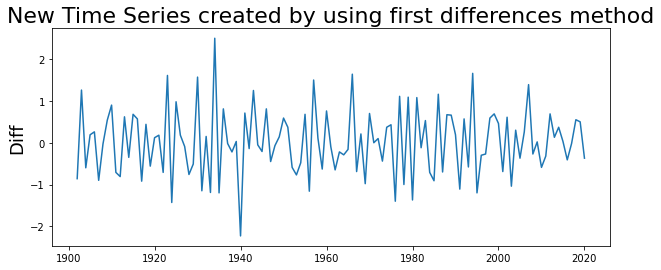

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(changed_temperatures['Temperature'])
plt.title('New Time Series created by using first differences method', fontsize=22)
plt.ylabel('Diff', fontsize=18)
plt.show()

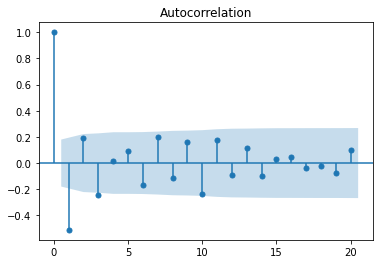

In [ ]:
acf_plot = plot_acf(changed_temperatures['Temperature'], lags = 20)

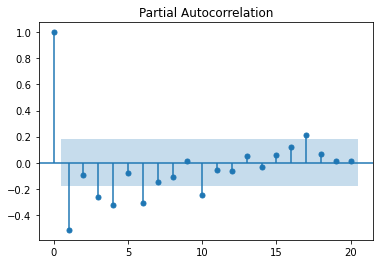

In [ ]:
pacf_plot = plot_pacf(changed_temperatures['Temperature'], lags = 20)

In [ ]:
model_ar1 = ARMA(changed_temperatures, order=(1, 0))
result_ar1 = model_ar1.fit()
print("The AIC for AR(1) is: ", result_ar1.aic)

The AIC for AR(1) is:  253.85134779847863


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
model_ar3 = ARMA(changed_temperatures, order=(3, 0))
result_ar3 = model_ar3.fit()
print("The AIC for AR(3) is: ", result_ar3.aic)

The AIC for AR(3) is:  249.2885119168136


In [ ]:
model_ar4 = ARMA(changed_temperatures, order=(4, 0))
result_ar4 = model_ar4.fit()
print("The AIC for AR(4) is: ", result_ar4.aic)

The AIC for AR(4) is:  239.592499044775


In [ ]:
model_ar6 = ARMA(changed_temperatures, order=(6, 0))
result_ar6 = model_ar6.fit()
print("The AIC for AR(6) is: ", result_ar6.aic)

The AIC for AR(6) is:  232.67386948473305


In [ ]:
model_ma1 = ARMA(changed_temperatures, order=(0, 1))
result_ma1 = model_ma1.fit()
print("The AIC for MA(1) is: ", result_ma1.aic)

The AIC for MA(1) is:  235.10899909516468


In [ ]:
model_ma3 = ARMA(changed_temperatures, order=(0, 3))
result_ma3 = model_ma3.fit()
print("The AIC for MA(3) is: ", result_ma3.aic)

The AIC for MA(3) is:  234.41168869762322


In [ ]:
model_arma11 = ARMA(changed_temperatures, order=(1, 1))
result_arma11 = model_arma11.fit()
print("The AIC for ARMA(1, 1) is: ", result_arma11.aic)

The AIC for ARMA(1, 1) is:  236.59217939049256


In [ ]:
model_arma13 = ARMA(changed_temperatures, order=(1, 3))
result_arma13 = model_arma13.fit()
print("The AIC for ARMA(1, 3) is: ", result_arma13.aic)

The AIC for ARMA(1, 3) is:  233.14386742647034


In [ ]:
model_arma31 = ARMA(changed_temperatures, order=(3, 1))
result_arma31 = model_arma31.fit()
print("The AIC for ARMA(3, 1) is: ", result_arma31.aic)

The AIC for ARMA(3, 1) is:  231.73269914381424


In [ ]:
model_arma41 = ARMA(changed_temperatures, order=(4, 1))
result_arma41 = model_arma41.fit()
print("The AIC for ARMA(4, 1) is: ", result_arma41.aic)

The AIC for ARMA(4, 1) is:  232.26122009672258


In [ ]:
model_arma61 = ARMA(changed_temperatures, order=(6, 1))
result_arma61 = model_arma61.fit()
print("The AIC for ARMA(6, 1) is: ", result_arma61.aic)

The AIC for ARMA(6, 1) is:  230.9605267817996


In [ ]:
import statsmodels

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed 

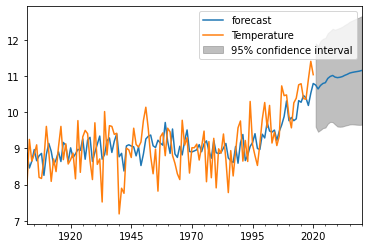

In [ ]:
model = statsmodels.tsa.arima_model.ARIMA(annual_temperatures, order = (6, 1, 1))
result = model.fit()
result.plot_predict(start='1902-01-01', end='2040-01-01')
plt.show()

In [ ]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Temperature   No. Observations:                  119
Model:                 ARIMA(6, 1, 1)   Log Likelihood                -106.480
Method:                       css-mle   S.D. of innovations              0.588
Date:                Mon, 23 May 2022   AIC                            230.961
Time:                        18:48:26   BIC                            255.973
Sample:                    01-01-1902   HQIC                           241.117
                         - 01-01-2020                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0184      0.010      1.821      0.069      -0.001       0.038
ar.L1.D.Temperature    -0.1401      0.182     -0.768      0.443      -0.498       0.217
ar.L2.D.Temperat

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


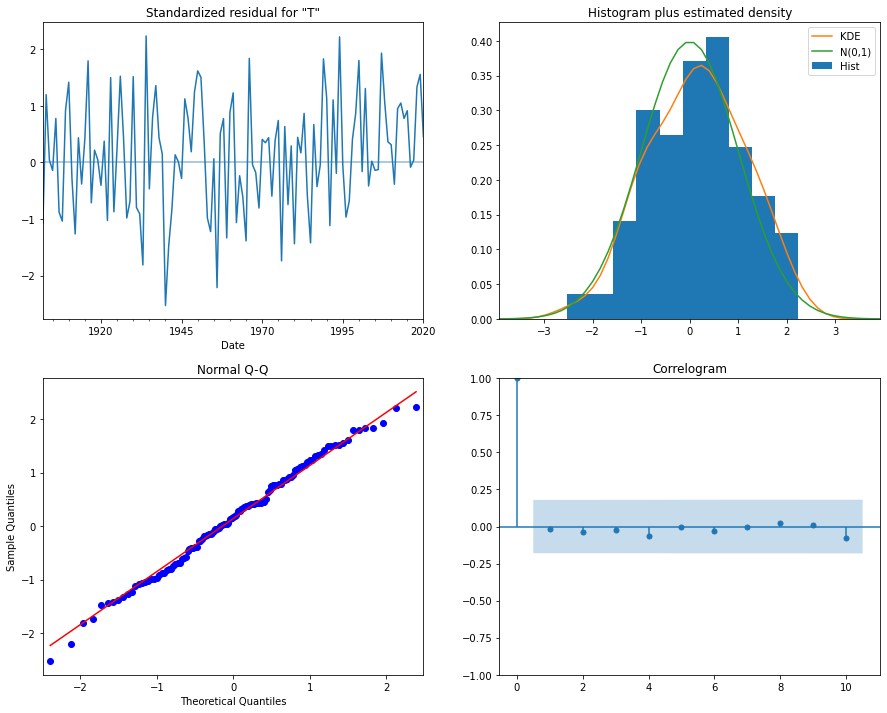

In [ ]:
# plot the original series and the forecasted series
model = ARIMA(annual_temperatures, order=(6, 1, 1))
result = model.fit()
result.plot_diagnostics(figsize=(15, 12))
# result.plot_diagnosis(start='1902-01-01', end='2040-01-01')
plt.show()

In [ ]:
# result.plot_diagnostics(figsize=(15, 12))

In [ ]:
residuals = result.resid

In [ ]:
print(np.mean(np.abs(residuals)))

0.48568196636706285


In [ ]:
print('Error:', np.sqrt(np.mean(residuals**2)))

Error: 0.6093230365592268


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed 

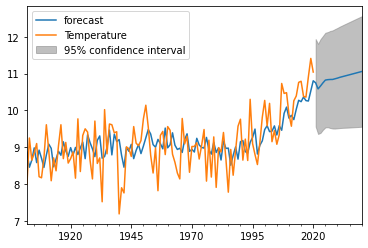

In [ ]:
model = statsmodels.tsa.arima_model.ARIMA(annual_temperatures, order = (3, 1, 1))
result = model.fit()
result.plot_predict(start='1902-01-01', end='2040-01-01')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


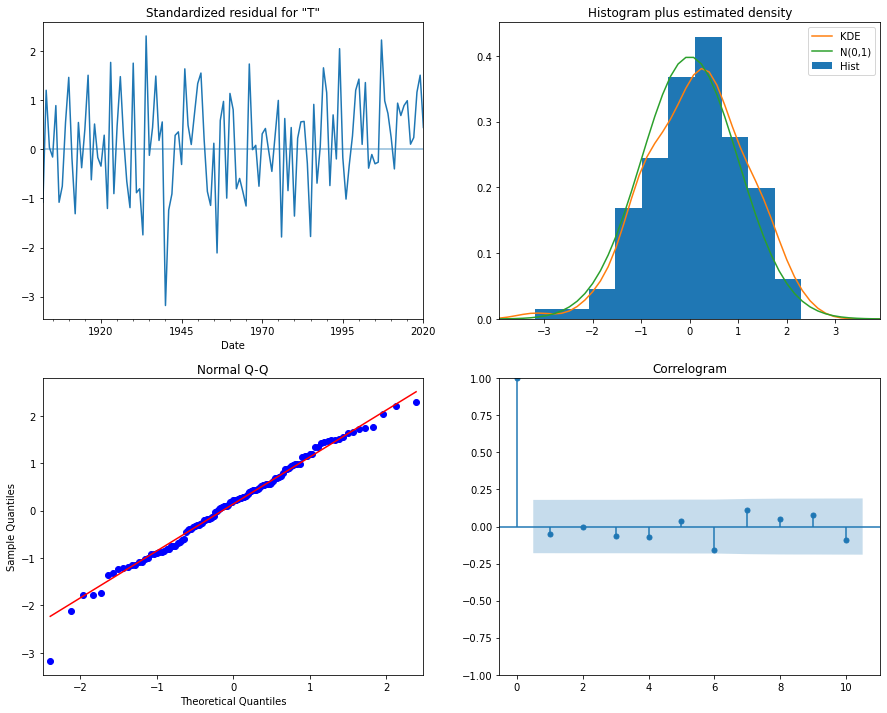

In [ ]:
# plot the original series and the forecasted series
model = ARIMA(annual_temperatures, order=(3, 1, 1))
result = model.fit()
result.plot_diagnostics(figsize=(15, 12))
# result.plot_diagnosis(start='1902-01-01', end='2040-01-01')
plt.show()